# Analysing PBMCs of Covid patiens and healthy controls

## LOad libraries 

In [200]:
import scanpy as sc
import os 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Load the data

In [201]:
os.getcwd()

'C:\\Users\\Nastavnik\\s3_project\\DDD_disk'

In [202]:
os.chdir('C:\\Users\\Nastavnik\\s3_project\\DDD_disk')

In [203]:
adata_cov1 = sc.read_10x_h5("data/nCoV_PBMC_1.h5")
adata_cov2 = sc.read_10x_h5("data/nCoV_PBMC_15.h5")
adata_cov3 = sc.read_10x_h5("data/nCoV_PBMC_17.h5")
adata_norm1 = sc.read_10x_h5("data/Normal_PBMC_13.h5")
adata_norm2 = sc.read_10x_h5("data/Normal_PBMC_14.h5")
adata_norm3 = sc.read_10x_h5("data/Normal_PBMC_5.h5")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site

In [204]:
adata_cov1.var_names_make_unique()
adata_cov2.var_names_make_unique()
adata_cov3.var_names_make_unique() 
adata_norm1.var_names_make_unique()
adata_norm2.var_names_make_unique()
adata_norm3.var_names_make_unique()

In [205]:
adata_cov1

AnnData object with n_obs × n_vars = 1500 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [206]:
adata_cov1.obs["sample"] = "cov1"
adata_cov2.obs["sample"] = "cov2"
adata_cov3.obs["sample"] = "cov3"
adata_norm1.obs["sample"] = "norm1"
adata_norm2.obs["sample"] = "norm2"
adata_norm3.obs["sample"] = "norm3"

In [207]:
adata_cov1.obs

,sample
AGGGTCCCATGACCCG-1,cov1
TACCCACAGCGGGTTA-1,cov1
CCCAACTTCATATGGC-1,cov1
TCAAGTGTCCGAACGC-1,cov1
ATTCCTAGTGACTGTT-1,cov1
...,...
ACTCCCAAGATGCGAC-1,cov1
AGTGCCGGTTGGTAGG-1,cov1
CCCATTGAGGCCCGTT-1,cov1
CAACGGCGTCGGCTAC-1,cov1


In [208]:
adata_cov1.obs["condition"] = "covid"
adata_cov2.obs["condition"] = "covid"
adata_cov3.obs["condition"] = "covid"
adata_norm1.obs["condition"] = "control"
adata_norm2.obs["condition"] = "control"
adata_norm3.obs["condition"] = "control"

In [209]:
adata_cov1.obs

,sample,condition
AGGGTCCCATGACCCG-1,cov1,covid
TACCCACAGCGGGTTA-1,cov1,covid
CCCAACTTCATATGGC-1,cov1,covid
TCAAGTGTCCGAACGC-1,cov1,covid
ATTCCTAGTGACTGTT-1,cov1,covid
...,...,...
ACTCCCAAGATGCGAC-1,cov1,covid
AGTGCCGGTTGGTAGG-1,cov1,covid
CCCATTGAGGCCCGTT-1,cov1,covid
CAACGGCGTCGGCTAC-1,cov1,covid


In [210]:
adata_norm1.obs

,sample,condition
AGGTCATAGGAGACCT-13,norm1,control
TCAATTCGTTCGGGTC-13,norm1,control
CCTACGTTCACTACGA-13,norm1,control
TCCTAATCAGTTAGGG-13,norm1,control
CAACCAACATGCCGAC-13,norm1,control
...,...,...
TTCCACGAGTAAGAGG-13,norm1,control
AGAGAGCAGAAACCCG-13,norm1,control
TAGAGTCTCTCAGGCG-13,norm1,control
CCTTCAGAGGTTAGTA-13,norm1,control


Concatenate all objects (combine adata objects into one)

In [211]:
adata_cov1

AnnData object with n_obs × n_vars = 1500 × 33538
    obs: 'sample', 'condition'
    var: 'gene_ids', 'feature_types', 'genome'

In [212]:
adata = adata_cov1.concatenate(adata_cov2, adata_cov3, adata_norm1,adata_norm2, adata_norm3)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [213]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [214]:
adata.obs

,sample,condition,batch
AGGGTCCCATGACCCG-1-0,cov1,covid,0
TACCCACAGCGGGTTA-1-0,cov1,covid,0
CCCAACTTCATATGGC-1-0,cov1,covid,0
TCAAGTGTCCGAACGC-1-0,cov1,covid,0
ATTCCTAGTGACTGTT-1-0,cov1,covid,0
...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5
TGACCCTGTAGATTAG-5-5,norm3,control,5
TCCTTTCGTAAGGCCA-5-5,norm3,control,5
CTACCCACACGACCTG-5-5,norm3,control,5


## Data QC

In [215]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

In [216]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]

In [217]:
adata.X = adata.X.toarray()

In [218]:
sum(mt_gene_mask)

13

In [219]:
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

In [220]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'

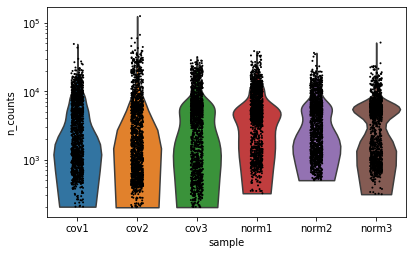

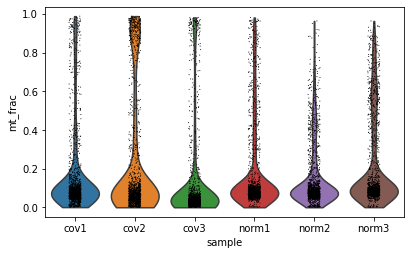

In [221]:
t1 = sc.pl.violin(adata, 'n_counts', groupby='sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

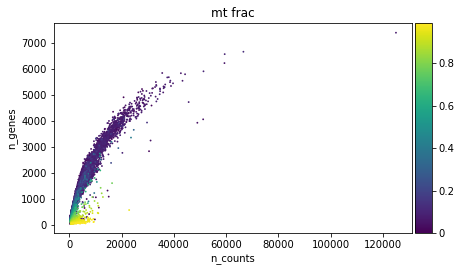

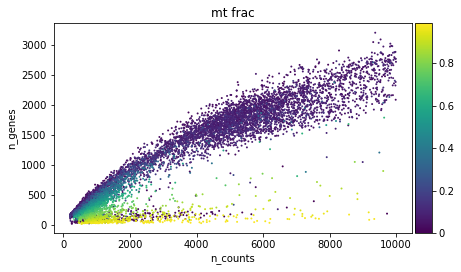

In [222]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='mt_frac')

In [223]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


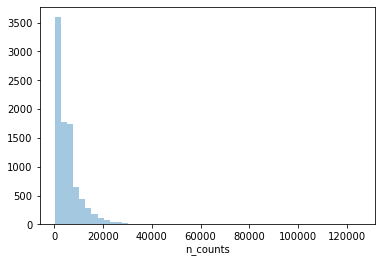

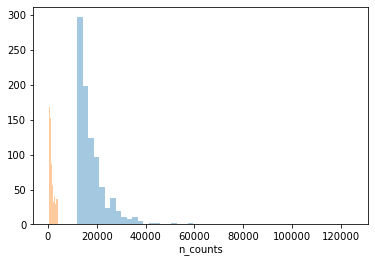

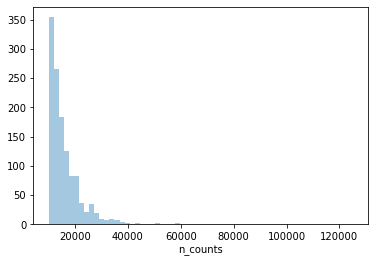

In [224]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()
p3_1 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>12000], kde=False) 
p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<4000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()


In [225]:
# n_counts_upper = 32000
# n_Counts_upper = 25000
# n_counts_lower = 450
# 

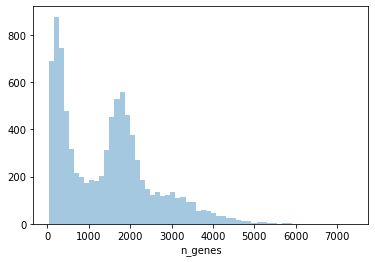

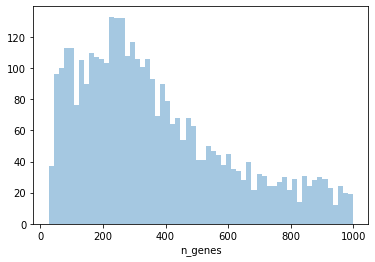

In [226]:
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<1000], kde=False, bins=60)
plt.show()

In [227]:
# n_genes_lower = 150
# n_genes_lower = 200

In [228]:
# mt_frac_upper = 0.2

In [229]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

In [230]:
adata_subset

View of AnnData object with n_obs × n_vars = 1500 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors'

In [231]:
adata_subset.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
ACTCCCAAGATGCGAC-1-0     7616.0
AGTGCCGGTTGGTAGG-1-0      472.0
CCCATTGAGGCCCGTT-1-0      770.0
CAACGGCGTCGGCTAC-1-0     8308.0
ATCACTTGTAGGCAAC-1-0      454.0
Name: n_counts, Length: 1500, dtype: float32

In [232]:
# cov1
# n_count_upper_1
# n_count_upper_2

# n_count_lower_1
# n_count_lower_2

# n_genes_lower

# mt_frac

In [233]:
adata_subset = adata[adata.obs['sample']=='cov3',:]

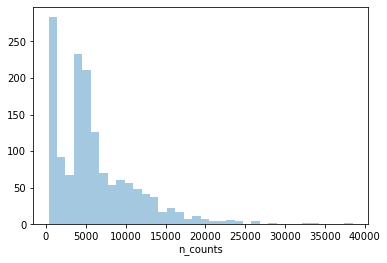

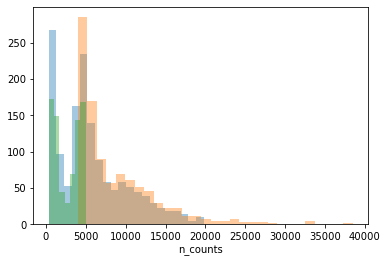

In [246]:
p8_1 = sb.distplot(adata_subset.obs['n_counts'], kde=False)
plt.show()
p8 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<20000], kde=False) 
p9 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>4000], kde=False)
p18 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<5000], kde=False)

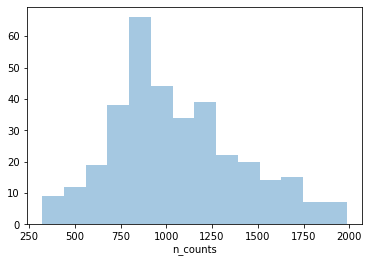

In [250]:
p21 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<2000], kde=False)

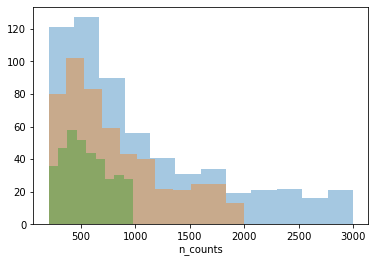

In [235]:
p10 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<3000], kde=False)
p11 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<2000], kde=False)
p22 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<1000], kde=False)

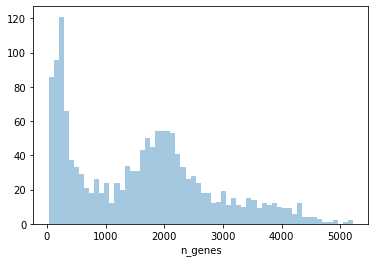

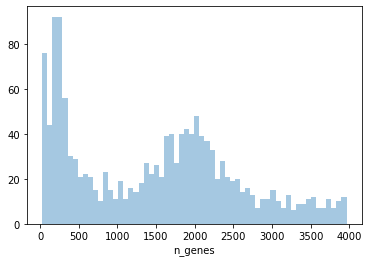

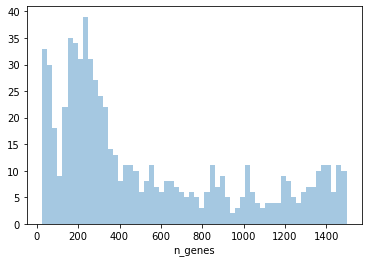

In [236]:
p12 = sb.distplot(adata_subset.obs['n_genes'], kde=False, bins=60)
plt.show()
p13 = sb.distplot(adata_subset.obs['n_genes'][adata.obs['n_genes']<4000], kde=False, bins=60)
plt.show()
p14 = sb.distplot(adata_subset.obs['n_genes'][adata.obs['n_genes']<1500], kde=False, bins=60)
plt.show()

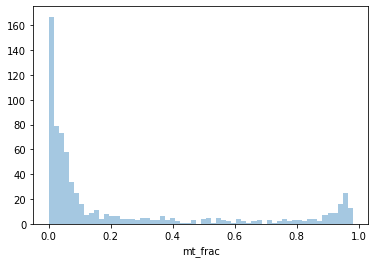

In [237]:
p30 = sb.distplot(adata_subset.obs['mt_frac'][adata_subset.obs['n_genes']<1500], kde=False, bins=60)
plt.show()                         

In [238]:
# cov3

# n_count_upper_1 = 10000
# n_count_upper_2 = 7500

# n_count_lower_1 = 800
# n_count_lower_2 = 

# n_genes_lower = 1300

# mt_frac_upper = 0.1

In [239]:
# norm1

# n_count_upper_1 = 6500
# n_count_upper_2 = 8500

# n_count_lower_1 = 800
# n_count_lower_2 = 

# n_genes_lower = 1300

# mt_frac_upper = 0.2


In [240]:
adata_subset = adata[adata.obs['sample']=='norm1',:]

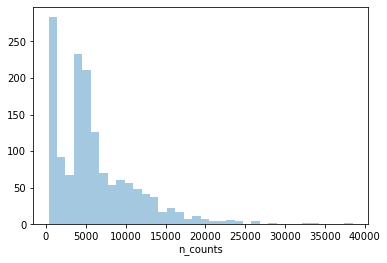

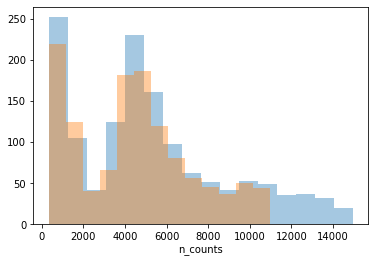

In [241]:
p31 = sb.distplot(adata_subset.obs['n_counts'], kde=False)
plt.show()
p32 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<15000], kde=False) 
p33 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<11000], kde=False) 

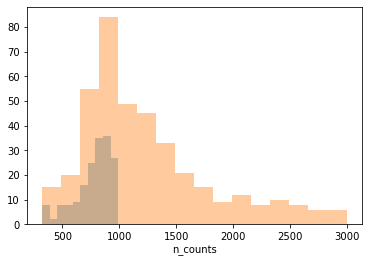

In [242]:
p34 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<1000], kde=False)
p44 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<3000], kde=False)

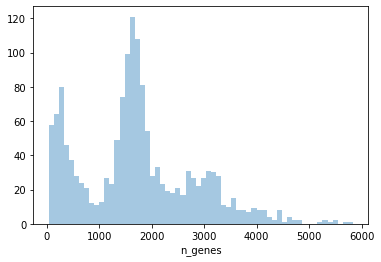

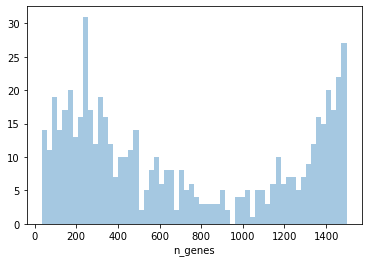

In [243]:
p35 = sb.distplot(adata_subset.obs['n_genes'], kde=False, bins=60)
plt.show()
p36 = sb.distplot(adata_subset.obs['n_genes'][adata_subset.obs['n_genes']<1500], kde=False, bins=60)
plt.show()

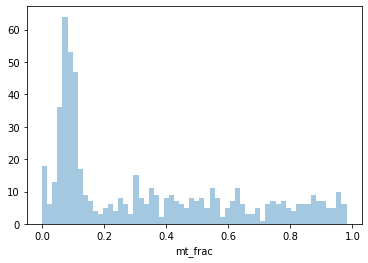

In [244]:
p37 = sb.distplot(adata_subset.obs['mt_frac'][adata_subset.obs['n_genes']<1500], kde=False, bins=60)
plt.show()                         